In [1]:
import pandas as pd

## Z-test and T-test

Question: Do height of me and my colleagues are statistically higher than population height? 

#### Population

In [2]:
df_popul = pd.read_csv('../input/height-of-male-and-female-by-country-2022/Height of Male and Female by Country 2022.csv')
df_popul.head(5)

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
0,1,Netherlands,183.78,170.36,6.03,5.59
1,2,Montenegro,183.30,169.96,6.01,5.58
2,3,Estonia,182.79,168.66,6.00,5.53
3,4,Bosnia and Herzegovina,182.47,167.47,5.99,5.49
4,5,Iceland,182.10,168.91,5.97,5.54


In [3]:
df_popul.drop(df_popul.columns[-2:], inplace=True, axis=1)
df_popul

,Rank,Country Name,Male Height in Cm,Female Height in Cm
0,1,Netherlands,183.78,170.36
1,2,Montenegro,183.30,169.96
2,3,Estonia,182.79,168.66
3,4,Bosnia and Herzegovina,182.47,167.47
4,5,Iceland,182.10,168.91
...,...,...,...,...
194,195,Mozambique,164.30,155.42
195,196,Papua New Guinea,163.10,156.89
196,197,Solomon Islands,163.07,156.79
197,198,Laos,162.78,153.10


In [4]:
df_popul['Height in Cm'] = df_popul[df_popul.columns[-2:]].mean(axis=1)
df_popul

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Height in Cm
0,1,Netherlands,183.78,170.36,177.070
1,2,Montenegro,183.30,169.96,176.630
2,3,Estonia,182.79,168.66,175.725
3,4,Bosnia and Herzegovina,182.47,167.47,174.970
4,5,Iceland,182.10,168.91,175.505
...,...,...,...,...,...
194,195,Mozambique,164.30,155.42,159.860
195,196,Papua New Guinea,163.10,156.89,159.995
196,197,Solomon Islands,163.07,156.79,159.930
197,198,Laos,162.78,153.10,157.940


In [5]:
df_popul.dtypes

Rank                     int64
Country Name            object
Male Height in Cm      float64
Female Height in Cm    float64
Height in Cm           float64
dtype: object

<AxesSubplot:ylabel='Frequency'>

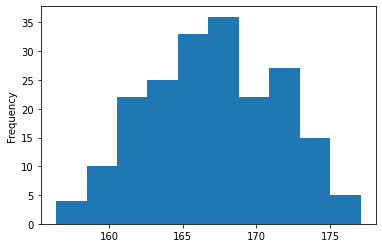

In [6]:
df_popul['Height in Cm'].plot.hist()

In [7]:
df_popul.describe()

,Rank,Male Height in Cm,Female Height in Cm,Height in Cm
count,199.000000,199.000000,199.000000,199.000000
mean,100.000000,173.089045,160.942915,167.015980
std,57.590508,4.949832,4.076377,4.432794
min,1.000000,160.130000,150.910000,156.420000
25%,50.500000,169.490000,158.240000,163.892500
50%,100.000000,173.530000,160.620000,166.995000
75%,149.500000,176.510000,163.870000,170.355000
max,199.000000,183.780000,170.360000,177.070000


#### Sample (me and colleagues)

## Z-test

Let's generate 41-elems set of our possible heights. To be able to use Z-test
* population should be normally distributed
* the sample size must be quite large ($n>30$)
* elements in a sample are randomly drawn from a population

*https://dfrieds.com/math/z-tests.html*

In [8]:
import numpy as np

In [9]:
np.random.seed(0)
sample_range = np.random.randint(160, 180, size=41)

In [10]:
df_sample = pd.DataFrame(sample_range)
df_sample.head(5)

,0
0,172
1,175
2,160
3,163
4,163


In [11]:
df_sample.describe()

,0
count,41.000000
mean,170.073171
std,6.581756
min,160.000000
25%,165.000000
50%,169.000000
75%,176.000000
max,179.000000


Let's summarize our data

In [12]:
popul_std = round(df_popul.describe()['Height in Cm']['std'],2)
popul_mean = round(df_popul.describe()['Height in Cm']['mean'],2)
sample_std = round(df_sample.describe()[0]['std'],2)
sample_mean = round(df_sample.describe()[0]['mean'],2)
significance_lvl = 0.05
n = 41

In [13]:
pd.Series(data={
    "popul_std": popul_std,
    "popul_mean": popul_mean,
    "sample_std": sample_std,
    "sample_mean": sample_mean,
    "significance_lvl": significance_lvl,
    "n": n,
    })

popul_std             4.43
popul_mean          167.02
sample_std            6.58
sample_mean         170.07
significance_lvl      0.05
n                    41.00
dtype: float64

## Z-test requirements:
1. Population's std and mean are known
2. Population are normally distributed
3. Sample size is greater than 30
4. Sample elements were drawn randomly from a population
5. Sample mean is known <br><br>
All above are fullfilled.

### By hand

Hypothesis: <br>
$H_0 = \mu \leq 167.02$ <br>
$H_1 = \mu > 167.02$ --> upper-tailed test <br>
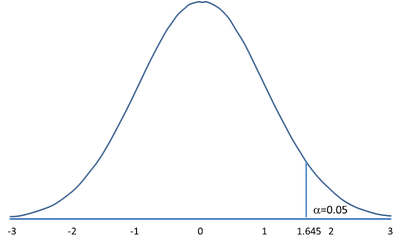

Default significance lvl = 95% --> $\alpha = 0.05$ <br>

$SSE$ = sum of squares error <br>
$Z_{statistic} = \frac{\overline{x}-\mu}{SSE}$ = $\frac{\overline{x}-\mu}{\frac{\sigma}{\sqrt{n}}}$ = $\frac{170.07-167.02}{4.43\div\sqrt{41}}=4.408$ <br>
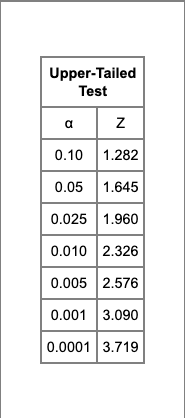 <br>
$Z_{critical} = 1.645$ <br> <br>

*https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_hypothesistest-means-proportions/bs704_hypothesistest-means-proportions3.html*

Since 4.408 is within the right range ($4.408>1.645$) we reject our $H_0$. It means that our average height is significant higher.

### With Python

In [14]:
from scipy import stats

In [15]:
sse = popul_std / np.sqrt(n)
z_score = (sample_mean - popul_mean)/sse
z_score

4.4084715404447135

In [16]:
z_critical = (-1)*stats.norm.ppf(0.05)
z_critical

1.6448536269514729

### Answer:
Our average height is significant higher than population's height.

Test for other significance levels.

In [17]:
stats.norm.ppf(0.01) # significance lvl = 99%

-2.3263478740408408

Test for other samples.

In [18]:
test_sample_mean_list = [170.07-i for i in np.arange(0,10,0.2)[1:]]

ind_list = []
for ind, item in enumerate(test_sample_mean_list):
    if item > popul_mean:
        ind_list.append(ind)
ind_max = max(ind_list)
ind_max

14

In [19]:
test_sample_mean_list = test_sample_mean_list[:ind_max+1]

In [20]:
sample_test_df = pd.DataFrame(data={
    "popul_std": popul_std,
    "popul_mean": popul_mean,
    "sample_mean": test_sample_mean_list,
    "significance_lvl": 0.05,
    "n": n,
    })
sample_test_df

,popul_std,popul_mean,sample_mean,significance_lvl,n
0,4.43,167.02,169.87,0.05,41
1,4.43,167.02,169.67,0.05,41
2,4.43,167.02,169.47,0.05,41
3,4.43,167.02,169.27,0.05,41
4,4.43,167.02,169.07,0.05,41
5,4.43,167.02,168.87,0.05,41
6,4.43,167.02,168.67,0.05,41
7,4.43,167.02,168.47,0.05,41
8,4.43,167.02,168.27,0.05,41
9,4.43,167.02,168.07,0.05,41


In [21]:
sample_test_df['sse'] = sse
sample_test_df['z_critical'] = (-1)*stats.norm.ppf(0.05)
sample_test_df['z_score'] = (sample_test_df['sample_mean'] - sample_test_df['popul_mean'])/sample_test_df['sse']

In [22]:
sample_test_df.loc[(sample_test_df['z_score'] < sample_test_df['z_critical'])]

,popul_std,popul_mean,sample_mean,significance_lvl,n,sse,z_critical,z_score
9,4.43,167.02,168.07,0.05,41,0.69185,1.644854,1.517671
10,4.43,167.02,167.87,0.05,41,0.69185,1.644854,1.228590
11,4.43,167.02,167.67,0.05,41,0.69185,1.644854,0.939510
12,4.43,167.02,167.47,0.05,41,0.69185,1.644854,0.650430
13,4.43,167.02,167.27,0.05,41,0.69185,1.644854,0.361350
14,4.43,167.02,167.07,0.05,41,0.69185,1.644854,0.072270


In case out average height was less then 168.07cm, then we would fail to reject $H_0$ and our height wouldn't be significant higher.

Now, let's consider smaller sample: 10-elems sized.

## T-test (One-sample)

In [23]:
np.random.seed(0)
small_sample_range = np.random.randint(160, 180, size=10)

df_small_sample = pd.DataFrame(small_sample_range)
df_small_sample.head(5)

,0
0,172
1,175
2,160
3,163
4,163


In [24]:
df_small_sample.describe()

,0
count,10.000000
mean,169.000000
std,6.733003
min,160.000000
25%,163.250000
50%,168.000000
75%,174.250000
max,179.000000


In [25]:
small_sample_mean = round(df_small_sample.describe()[0]['mean'],2)
small_sample_std = round(df_small_sample.describe()[0]['std'],2)
significance_lvl = 0.05
n = 10

In [26]:
pd.Series(data={
    "popul_std": popul_std,
    "popul_mean": popul_mean,
    "small_sample_std": small_sample_std,
    "small_sample_mean": small_sample_mean,
    "significance_lvl": significance_lvl,
    "n": n,
    })

popul_std              4.43
popul_mean           167.02
small_sample_std       6.73
small_sample_mean    169.00
significance_lvl       0.05
n                     10.00
dtype: float64

## T-test requirements:
1. Population and sample are normally distributed.
2. Sample size is lower than 30
3. Population and sample variable is continuous.
4. Sample elements were drawn randomly from a population <br><br>
All above are fullfilled.

https://dfrieds.com/math/intro-t-test-terms-and-one-sample-test.html

### By hand

Hypothesis: <br>
$H_0 = \mu \leq 167.02$ <br>
$H_1 = \mu > 167.02$ --> upper-tailed test <br>

Default significance lvl = 95% --> $\alpha = 0.05$ <br>

Standard Deviation of sample $s = \sqrt{\frac{\sum(x-\overline{x})^2}{n-1}}=6.73$ <br>
Standard Error of mean $SE_{\overline{x}}=\frac{s}{\sqrt{n}}=\frac{6.73}{\sqrt{10}}=2.13$ <br>
$t_{statistic} = \frac{\overline{x}-\mu}{SE_{\overline{x}}}$ = $\frac{169-167.02}{2.13}=0.93$<br>

degrees of freedom  = $df = n-1=9$ <br>
$t_{critical} = 1.833$ <br> <br>

*https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_hypothesistest-means-proportions/bs704_hypothesistest-means-proportions3.html*

Since 0.93 is outside the right range ($0.93<1.833$) we fail to reject our $H_0$. It means that our average height isn't significant higher.

### With python

In [27]:
t_score, p_value = stats.ttest_1samp(df_small_sample[0], 
                                     popul_mean, 
                                     alternative = 'greater')
t_score

0.9299430722614421

In [28]:
t_critical = (-1)*round(stats.t.ppf(q=significance_lvl, 
                                    df=n-1), 2)
t_critical

1.83

In [29]:
p_value = round(p_value, 2)

In [30]:
if p_value > significance_lvl:
    print(f"{p_value} > {significance_lvl}: fail to reject null hypothesis")
else:
    print(f"{p_value} < {significance_lvl}: reject null hypothesis")

0.19 > 0.05: fail to reject null hypothesis


We fail to reject $H_0$, so our height isn't significant higher, which is totally opposite answer against the one from Z-test. <br>
https://online.stat.psu.edu/statprogram/reviews/statistical-concepts/hypothesis-testing/p-value-approach

Let's check it for the same sample_std as in Z-test.

Standard Deviation of sample $s = \sqrt{\frac{\sum(x-\overline{x})^2}{n-1}}=6.58$ <br>
Standard Error of mean $SE_{\overline{x}}=\frac{s}{\sqrt{n}}=\frac{6.58}{\sqrt{10}}=2.08$ <br>
$t_{statistic} = \frac{\overline{x}-\mu}{SE_{\overline{x}}}$ = $\frac{170.07-167.02}{2.08}=1.47$<br>

degrees of freedom  = $df = n-1=9$ <br>
$t_{critical} = 1.833$ <br> <br>

*https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_hypothesistest-means-proportions/bs704_hypothesistest-means-proportions3.html*

Since 1.47 is outside the right range ($1.47<1.833$) we fail to reject our $H_0$. It means that our average height isn't significant higher.

## Conslusion
Above case indicated that sample size play keys role in hypothesis testing.